Nama : Sausan<br>
Grup : DS2

Link: https://colab.research.google.com/drive/1pulzqdGHgNIRZ5M00vevYJqf6g0tNIno?usp=sharing

##Day 5

Kamis, 05 Oktober 2023

#Study Case Credit Risk Analysis


In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#koneksi dari COLAB ke Gdrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load data to colab
path= '/content/drive/MyDrive/DataSource/credit_risk_1.csv'

load_data=pd.read_csv(path)
load_data

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...,...
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [4]:
#membuat data frame
df=pd.DataFrame(load_data)
df.tail()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
695,695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,698,45,1,19,22,77,8.4,2.302608,4.165392,0.0
699,699,37,1,12,14,44,14.7,2.994684,3.473316,0.0


Goal:
1. Prediksi potensi nasabah gagal bayar
2. Meningkatkan batas kredit

Berdasarkan fitur kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.

Pada analisis ini juga akan dilakukan teknik sampel untuk mengidentifikasi hubungan antara karakteristik konsumen.

Data desc:
1. age = umur nasabah
2. ed = level pendidikan
3. employ = masa jabatan saat ini
4. adress = jumlah tahun di alamat yg sama
5. income = pendapatan nasabah
6. debtinc = debt to income ratio
7. othdebt = utang lainnya
8. default = label pelanggan gagal/tidak gagal di masa lalu

In [5]:
#melihat info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [7]:
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

In [6]:
df['age'].value_counts()

29    44
28    37
39    37
31    36
41    34
34    33
36    29
27    28
40    27
35    27
32    25
33    25
30    24
24    24
38    23
26    23
37    22
25    20
23    18
43    17
42    16
47    16
45    16
48    15
46    13
22    12
21    10
44     9
50     8
52     7
53     6
51     6
54     4
49     4
55     2
20     2
56     1
Name: age, dtype: int64

<Axes: xlabel='variable', ylabel='value'>

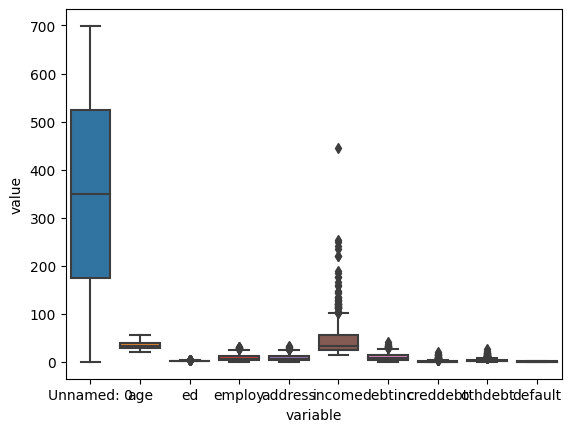

In [11]:
sns.boxplot(x='variable', y='value', data=pd.melt(df))

In [9]:
dfx = df.drop('Unnamed: 0', axis = 1)

<Axes: xlabel='variable', ylabel='value'>

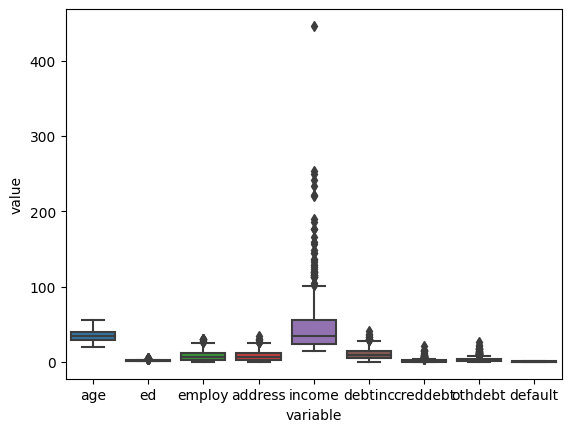

In [10]:
sns.boxplot(x= 'variable', y= 'value', data= pd.melt(dfx))

<Axes: xlabel='variable', ylabel='value'>

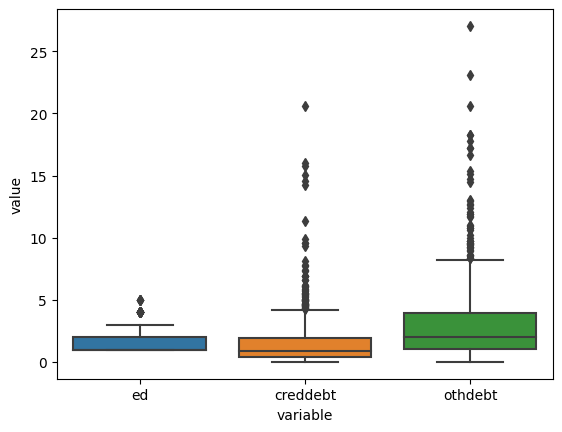

In [12]:
dfx1 = df[['ed','creddebt', 'othdebt']]
sns.boxplot(x= 'variable', y= 'value', data= pd.melt(dfx1))

<Axes: xlabel='variable', ylabel='value'>

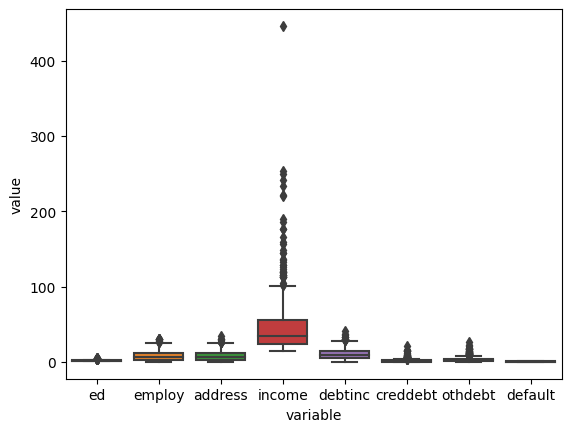

In [13]:
dfx2  = df.drop(['age', 'Unnamed: 0'], axis= 1)
sns.boxplot(x= 'variable', y= 'value', data= pd.melt(dfx2))

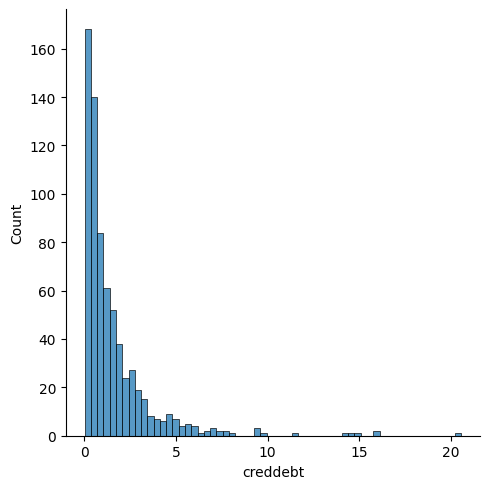

In [16]:
sns.displot(x='creddebt', data=dfx2)

<Axes: xlabel='creddebt', ylabel='ed'>

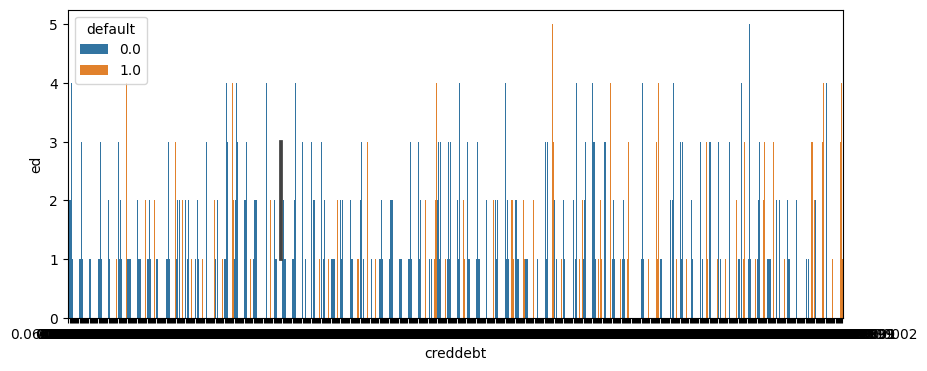

In [18]:
plt.figure(figsize=(10,4))
sns.barplot(x='creddebt', y='ed', hue='default', data=df)

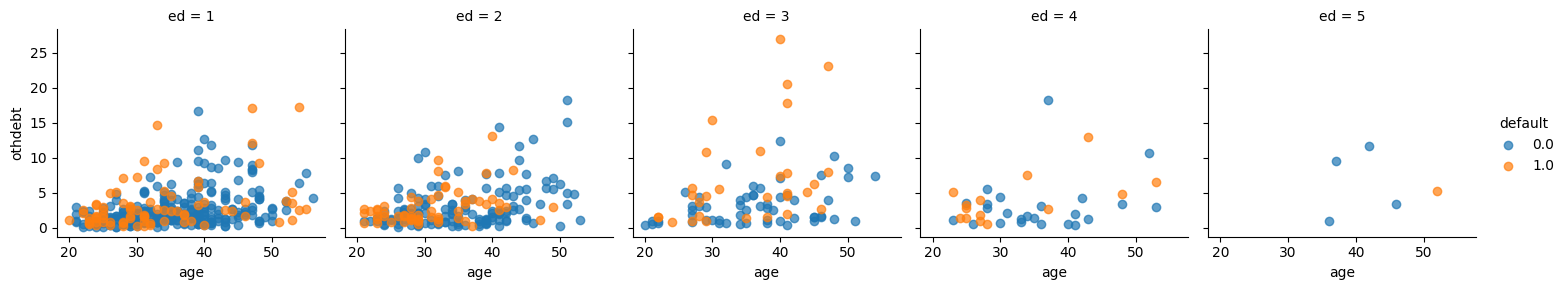

In [17]:
scatplot= sns.FacetGrid(df, col= 'ed', hue= 'default')
scatplot.map(plt.scatter, 'age', 'othdebt', alpha= .7)
scatplot.add_legend()

## Interpretasi Grafik
**Tingkat Pendidikan 1**

Pada range usia 20-30 tingkat pendidikan 1, terjadi banyak gagal bayar

**Tingkat Pendidikan 2**

Pada range usia 20-40 di level ED = 2, banyak terjadi gagal bayar

**Tingkat Pendidikan 3**

Pada range usia 30-45 di level ED = 3, banyak terjadi gagal bayar

**Tingkat Pendidikan 4**

Pada range usia 25-30 di level ED = 4, banyak terjadi gagal bayar

**Tingkat Pendidikan 5**

Pada range usia > 50 di level ED = 5, banyak terjadi gagal bayar